In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

%matplotlib inline 

df = pd.read_csv('https://stepik.org/media/attachments/course/4852/dogs_n_cats.csv',sep = ',')
df

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям,Вид
0,15,18.0,1,1,0,собачка
1,20,24.0,1,0,0,собачка
2,34,40.8,1,1,0,собачка
3,26,31.2,1,1,0,собачка
4,16,19.2,1,1,0,собачка
...,...,...,...,...,...,...
995,8,3.2,1,0,1,котик
996,7,2.8,1,0,1,котик
997,6,2.4,1,0,1,котик
998,7,2.8,1,0,1,котик


In [6]:
X = df.drop(['Вид'], axis = 1)
y = df['Вид']

0      собачка
1      собачка
2      собачка
3      собачка
4      собачка
        ...   
995      котик
996      котик
997      котик
998      котик
999      котик
Name: Вид, Length: 1000, dtype: object

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.33, random_state = 50)

In [12]:
clf = tree.DecisionTreeClassifier()
parametors = {'criterion':['gini','entropy'],'max_depth': range(1,10)}

In [17]:
from sklearn.model_selection import GridSearchCV
grid_search_cv_clf = GridSearchCV(clf, param_grid=parametors, cv =5)
grid_search_cv_clf.fit(X_train,y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10)})

In [18]:
grid_search_cv_clf.best_score_

1.0

In [19]:
grid_search_cv_clf.best_estimator_

DecisionTreeClassifier(max_depth=1)

In [20]:
grid_search_cv_clf.best_params_

{'criterion': 'gini', 'max_depth': 1}

[Text(167.4, 163.07999999999998, 'X[1] <= 11.8\ngini = 0.5\nsamples = 670\nvalue = [331, 339]'),
 Text(83.7, 54.360000000000014, 'gini = 0.0\nsamples = 331\nvalue = [331, 0]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.0\nsamples = 339\nvalue = [0, 339]')]

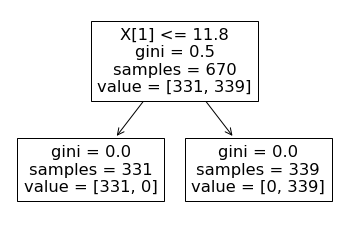

In [22]:
best_clf = grid_search_cv_clf.best_estimator_
tree.plot_tree(best_clf)

In [23]:
best_clf.score(X_test,y_test)

1.0

In [24]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(best_clf.predict(X_test),y_test,average= 'micro')

(1.0, 1.0, 1.0, None)